In [31]:
import json
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import mean
import time
from sklearn.metrics import confusion_matrix

In [32]:
surveyDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/local_project/DownloadedResults/Survey"
resultDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/local_project/DownloadedResults"
originalMapDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/local_project/Python"
fileName = "Result"

## dictionary

In [33]:
player_result_dict = dict()
player_map_dict = dict()
player_survey_dict = dict()
result_mapname_dict = dict()

In [34]:
# build the dictionary with ip as key and result file name as value

resultFinished = False
startResultIndex = 1

while(resultFinished == False):

    
    completeResultFilePath = resultDir + "/" + fileName + str(startResultIndex) + "t.txt"

    if os.path.isfile(completeResultFilePath):
        with open(completeResultFilePath) as resultFile:
            resultData = json.load(resultFile)
            resultIp = resultData["ip"]  
            resultMap = resultData["mapName"]
            
            if resultIp not in player_result_dict:
                player_result_dict[resultIp] = set()
                player_map_dict[resultIp] = set()
                
            player_result_dict[resultIp].add(fileName + str(startResultIndex) + "t.txt")
            player_map_dict[resultIp].add(resultMap[0])
            result_mapname_dict[fileName + str(startResultIndex) + "t.txt"] = set()
            result_mapname_dict[fileName + str(startResultIndex) + "t.txt"].add(resultMap[0])
            startResultIndex += 1

    else:
        resultFinished = True

In [35]:
# build the dictionary with ip as key and map played as value

surveyFinished = False
startSurveyIndex = 1

while(surveyFinished == False):

    completeSurveyFilePath = surveyDir + "/" + fileName + str(startSurveyIndex) + ".txt"

    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:
            surveyData = json.load(surveyFile)
            surveyIp = surveyData["ip"]  
            
            if surveyIp not in player_survey_dict:
                player_survey_dict[surveyIp] = set()
                
            player_survey_dict[surveyIp].add(fileName + str(startSurveyIndex) + ".txt")
            startSurveyIndex += 1

    else:
        surveyFinished = True

In [36]:
for key in result_mapname_dict:
    print(key, "\t->\t", result_mapname_dict[key])

Result1t.txt 	->	 {'open1.map'}
Result2t.txt 	->	 {'open2.map'}
Result3t.txt 	->	 {'open1.map'}
Result4t.txt 	->	 {'open1.map'}
Result5t.txt 	->	 {'uffici2.map'}
Result6t.txt 	->	 {'open2.map'}
Result7t.txt 	->	 {'open1.map'}
Result8t.txt 	->	 {'open2.map'}
Result9t.txt 	->	 {'uffici2.map'}
Result10t.txt 	->	 {'open2.map'}
Result11t.txt 	->	 {'uffici2.map'}
Result12t.txt 	->	 {'uffici1.map'}
Result13t.txt 	->	 {'uffici2.map'}
Result14t.txt 	->	 {'open2.map'}
Result15t.txt 	->	 {'open1.map'}
Result16t.txt 	->	 {'open2.map'}
Result17t.txt 	->	 {'open1.map'}
Result18t.txt 	->	 {'uffici1.map'}
Result19t.txt 	->	 {'open1.map'}
Result20t.txt 	->	 {'open2.map'}
Result21t.txt 	->	 {'open1.map'}
Result22t.txt 	->	 {'uffici1.map'}
Result23t.txt 	->	 {'uffici2.map'}
Result24t.txt 	->	 {'uffici1.map'}
Result25t.txt 	->	 {'open1.map'}
Result26t.txt 	->	 {'open2.map'}
Result27t.txt 	->	 {'uffici2.map'}
Result28t.txt 	->	 {'open2.map'}


In [37]:
for key in player_result_dict:
    print(key, "\t->\t", player_result_dict[key])

10.81.60.148 	->	 {'Result1t.txt', 'Result2t.txt'}
10.190.28.15 	->	 {'Result3t.txt'}
10.21.145.113 	->	 {'Result4t.txt'}
10.41.203.49 	->	 {'Result6t.txt', 'Result5t.txt'}
10.181.109.73 	->	 {'Result8t.txt', 'Result7t.txt'}
10.7.181.120 	->	 {'Result9t.txt', 'Result10t.txt'}
10.150.134.248 	->	 {'Result12t.txt', 'Result11t.txt'}
10.13.215.245 	->	 {'Result13t.txt', 'Result14t.txt'}
10.31.72.218 	->	 {'Result15t.txt', 'Result16t.txt'}
10.30.82.114 	->	 {'Result18t.txt', 'Result17t.txt'}
10.45.76.149 	->	 {'Result19t.txt', 'Result20t.txt'}
10.45.245.200 	->	 {'Result21t.txt', 'Result22t.txt'}
10.51.190.34 	->	 {'Result23t.txt', 'Result24t.txt'}
10.45.249.93 	->	 {'Result25t.txt', 'Result26t.txt'}
10.65.198.176 	->	 {'Result27t.txt', 'Result28t.txt'}


In [38]:
for key in player_map_dict:
    print(key, "\t->\t", player_map_dict[key])

10.81.60.148 	->	 {'open1.map', 'open2.map'}
10.190.28.15 	->	 {'open1.map'}
10.21.145.113 	->	 {'open1.map'}
10.41.203.49 	->	 {'open2.map', 'uffici2.map'}
10.181.109.73 	->	 {'open1.map', 'open2.map'}
10.7.181.120 	->	 {'open2.map', 'uffici2.map'}
10.150.134.248 	->	 {'uffici1.map', 'uffici2.map'}
10.13.215.245 	->	 {'open2.map', 'uffici2.map'}
10.31.72.218 	->	 {'open1.map', 'open2.map'}
10.30.82.114 	->	 {'uffici1.map', 'open1.map'}
10.45.76.149 	->	 {'open1.map', 'open2.map'}
10.45.245.200 	->	 {'uffici1.map', 'open1.map'}
10.51.190.34 	->	 {'uffici1.map', 'uffici2.map'}
10.45.249.93 	->	 {'open1.map', 'open2.map'}
10.65.198.176 	->	 {'open2.map', 'uffici2.map'}


In [39]:
for key in player_survey_dict:
    print(key, "\t->\t", player_survey_dict[key])

10.41.203.49 	->	 {'Result1.txt'}
10.181.109.73 	->	 {'Result2.txt'}
10.7.181.120 	->	 {'Result3.txt'}
10.150.134.248 	->	 {'Result4.txt'}
10.13.215.245 	->	 {'Result5.txt'}
10.31.72.218 	->	 {'Result6.txt'}
10.30.82.114 	->	 {'Result7.txt'}
10.45.76.149 	->	 {'Result8.txt'}
10.45.245.200 	->	 {'Result9.txt'}
10.51.190.34 	->	 {'Result10.txt'}
10.45.249.93 	->	 {'Result11.txt'}
10.65.198.176 	->	 {'Result12.txt'}


## Similarity player

#### based on first and second question of survey

10.41.203.49 	->	 1 3
10.181.109.73 	->	 1 2
10.7.181.120 	->	 1 2
10.150.134.248 	->	 1 3
10.13.215.245 	->	 4 3
10.31.72.218 	->	 1 3
10.30.82.114 	->	 1 2
10.45.76.149 	->	 1 2
10.45.245.200 	->	 2 2
10.51.190.34 	->	 4 3
10.45.249.93 	->	 1 3
10.65.198.176 	->	 4 3


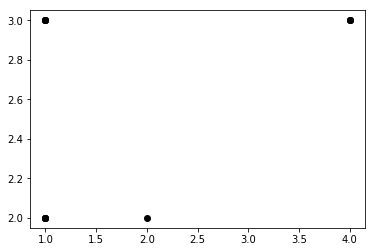

In [40]:
%matplotlib inline
startSurveyIndex = 1
surveyFinished = False

while(surveyFinished == False):
      
    completeSurveyFilePath = surveyDir + "/" + fileName + str(startSurveyIndex) + ".txt"
    
    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:
                
                data = json.load(surveyFile)
                
                choiceone = data["choiceone"]
                choicetwo = data["choicetwo"]
                plt.plot(int(choiceone), int(choicetwo), "ko")
                print(data["ip"],"\t->\t", int(choiceone), int(choicetwo))
                
                startSurveyIndex += 1
    else:
        surveyFinished = True
        
plt.show()

i "migliori giocatori" sono 10.150.134.248, 10.51.190.34, 10.65.198.176

10.41.203.49 	->	 2
10.181.109.73 	->	 3
10.7.181.120 	->	 1
10.150.134.248 	->	 3
10.13.215.245 	->	 2
10.31.72.218 	->	 1
10.30.82.114 	->	 2
10.45.76.149 	->	 1
10.45.245.200 	->	 3
10.51.190.34 	->	 3
10.45.249.93 	->	 2
10.65.198.176 	->	 3


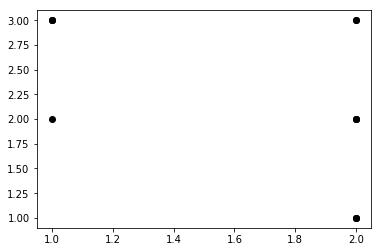

In [41]:
startSurveyIndex = 1
surveyFinished = False

while(surveyFinished == False):
      
    completeSurveyFilePath = surveyDir + "/" + fileName + str(startSurveyIndex) + ".txt"
    
    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:
                
                data = json.load(surveyFile)
                
                choicethree = data["choicethree"]
                mapUsed = data["mapname"]
                
                if mapUsed == "uffici1.map":
                    plt.plot(1, int(choicethree), "ko")
                    
                if mapUsed == "open2.map":
                    plt.plot(2, int(choicethree), "ko")
                    
                
                order = -1
                if mapUsed in player_map_dict[data["ip"]]:
                    order = list(player_map_dict[data["ip"]]).index(mapUsed)
                    resultFileString = list(player_result_dict[data["ip"]])[order]
                
                print(data["ip"],"\t->\t", int(choicethree))
                
                startSurveyIndex += 1
    else:
        surveyFinished = True
        
plt.show()

## draw the path

In [42]:
def rotate(x, y, origin, mapName):
    
    # shift to origin
    x1 = x #- origin[0]
    y1 = y #- origin[1]

    #rotate
    x2 = y1
    y2 = -x1
    
    # shift back
    x3 = x2
    if mapName == "uffici2.map":
        y3 = y2 +53
    if mapName == "open2.map":
        y3 = y2 +57
    if mapName == "open1.map":
        y3 = y2 +48
    if mapName == "uffici1.map":
        y3 = y2 +54 

    return x3, y3

In [43]:
def DrawPath(resultFilePath):
    completePath = resultDir + "/" + resultFilePath
    
    if os.path.isfile(completePath):
        with open(completePath) as pathFile:
            data = json.load(pathFile)
            mapName = data["mapName"][0]
            array_position = data["position"]
            
            if mapName == "open1.map":
                originalMapFile = "open1PythonFormat.map.txt"
            if mapName == "open2.map":
                originalMapFile = "open2PythonFormat.map.txt"
            if mapName == "uffici1.map":
                originalMapFile = "uffici1PythonFormat.map.txt"
            if mapName == "uffici2.map":
                originalMapFile = "uffici2PythonFormat.map.txt"
    
    # draw the original map
    if os.path.isfile(originalMapDir + "/" + originalMapFile):
        with open(originalMapDir + "/" + originalMapFile) as f:
            array = []
            content = f.readlines()

            content = [x.strip() for x in content]
            j = 0
            for line in content:
                array = line.split(',')
                for i in range(len(array)):
                    a = int(array[i])
                    if a == 1:
                        plt.plot(i, len(content)-j, 'ks')
                        
                    if a == 4:
                        plt.plot(i, len(content)-j , 'gs')

                j = j + 1 
                
        
    #draw the path
    plt.ion()
    origin = (0.0,0.0)
    for i in range(len(array_position) - 1):
        x, z = array_position[i].split(",")
        x, z = rotate(int(x),int(z), origin, mapName)
        
        a, b = array_position[i + 1].split(",")
        a, b = rotate(int(a),int(b), origin, mapName)

        plt.plot([x, a], [z, b], 'k-')
        plt.pause(0.1)
        
    plt.show()
    
            

Using matplotlib backend: Qt5Agg


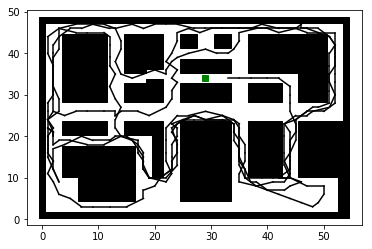

In [44]:
%matplotlib
DrawPath("Result15t.txt")

## distance analysis

In [45]:
def ComputeDistance(array_position):
    
    distance = 0
    
    for i in range(len(array_position) - 1):
        x, y = array_position[i].split(",")
        a, b = array_position[i + 1].split(",")
        x = int(x)
        y = int(y)
        a = int(a)
        b = int(b)
        distance += math.sqrt(math.pow(a-x, 2) + math.pow(b-y, 2))
    return distance   

In [46]:
resultFinished = False
startResultIndex = 1
distance_uffici1 = {}
distance_uffici2 = {}
distance_open1 = {}
distance_open2 = {}

while(resultFinished == False):
    
    completeResultFilePath = resultDir + "/" + fileName + str(startResultIndex) + "t.txt"
    
    if os.path.isfile(completeResultFilePath):
        with open(completeResultFilePath) as resultFile:

            resultData = json.load(resultFile)
            
            resultIp = resultData["ip"]
            resultMap = resultData["mapName"][0]
            array_position = resultData["position"]
            
            if resultMap == "open1.map":
                distance_open1[resultIp] = ComputeDistance(array_position)               
            if resultMap == "open2.map":
                distance_open2[resultIp] = ComputeDistance(array_position)
            if resultMap == "uffici1.map":
                distance_uffici1[resultIp] = ComputeDistance(array_position)
            if resultMap == "uffici2.map":
                distance_uffici2[resultIp] = ComputeDistance(array_position)
            
            startResultIndex += 1

    else:
        resultFinished = True

### open1

10.30.82.114 	 27.52733584216013
10.21.145.113 	 30.41640786499874
10.81.60.148 	 186.69619991867233
10.190.28.15 	 214.8928892247379
10.45.249.93 	 250.8503065539761
10.45.245.200 	 266.58597573261966
10.181.109.73 	 273.7307362563458
10.45.76.149 	 570.5238878058306
10.31.72.218 	 819.467253015037


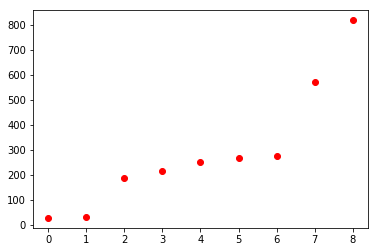

min:  27.52733584216013
max:  819.467253015037
mean:  293.41011024604205


In [47]:
%matplotlib inline

count = 0
open1sorted = sorted(distance_open1.items(), key=lambda kv: kv[1])
for i in open1sorted:
    print(i[0], "\t", i[1])
    plt.plot(count, i[1], "ro")
    count += 1
plt.show()

print("min: ", open1sorted[0][1])
print("max: ", open1sorted[len(open1sorted) - 1][1])
print("mean: ", mean(list(distance_open1.values())))

### open2

10.7.181.120 	 205.17668566812878
10.41.203.49 	 207.9313224755435
10.45.76.149 	 218.64390481503682
10.31.72.218 	 251.8116380115376
10.81.60.148 	 272.2440180965026
10.45.249.93 	 433.63688539384117
10.65.198.176 	 475.18829212013185
10.13.215.245 	 911.4834883904771
10.181.109.73 	 1578.7217031670332


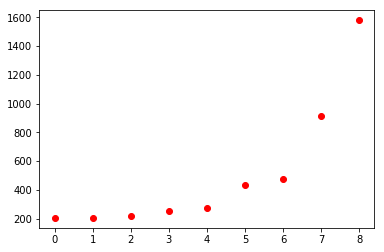

min:  205.17668566812878
max:  1578.7217031670332
mean:  506.09310423758143


In [48]:
%matplotlib inline

count = 0
open2sorted = sorted(distance_open2.items(), key=lambda kv: kv[1])
for i in open2sorted:
    print(i[0], "\t", i[1])
    plt.plot(count, i[1], "ro")
    count += 1
plt.show()

print("min: ", open2sorted[0][1])
print("max: ", open2sorted[len(open2sorted) - 1][1])
print("mean: ", mean(list(distance_open2.values())))

### uffici1

10.45.245.200 	 384.6177755061994
10.150.134.248 	 596.4647513134933
10.30.82.114 	 725.7327841274413
10.51.190.34 	 808.0884722681133


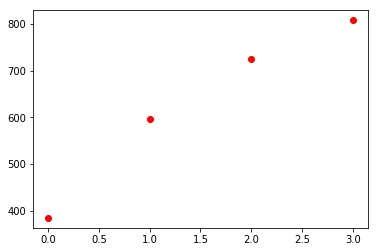

min:  384.6177755061994
max:  808.0884722681133
mean:  628.7259458038118


In [49]:
%matplotlib inline

count = 0
uffici1sorted = sorted(distance_uffici1.items(), key=lambda kv: kv[1])
for i in uffici1sorted:
    print(i[0], "\t", i[1])
    plt.plot(count, i[1], "ro")
    count += 1
plt.show()

print("min: ", uffici1sorted[0][1])
print("max: ", uffici1sorted[len(uffici1sorted) - 1][1])
print("mean: ", mean(list(distance_uffici1.values())))

### uffici2

10.41.203.49 	 64.6426524245728
10.150.134.248 	 83.55144257626988
10.65.198.176 	 119.37009299206893
10.7.181.120 	 136.48204086418977
10.13.215.245 	 165.87957675224888
10.51.190.34 	 279.12032189870257


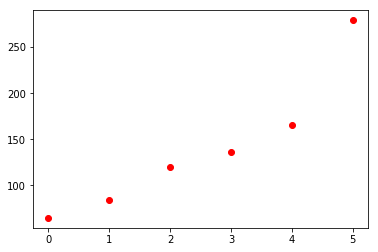

min:  64.6426524245728
max:  279.12032189870257
mean:  141.50768791800883


In [50]:
%matplotlib inline

count = 0
uffici2sorted = sorted(distance_uffici2.items(), key=lambda kv: kv[1])
for i in uffici2sorted:
    print(i[0], "\t", i[1])
    plt.plot(count, i[1], "ro")
    count += 1
plt.show()

print("min: ", uffici2sorted[0][1])
print("max: ", uffici2sorted[len(uffici2sorted) - 1][1])
print("mean: ", mean(list(distance_uffici2.values())))

## area explored

In [51]:
def Neighbors(coordinate):
    resList = [[0, 0]]
    for i in [-2, -1, 0, 1, 2]:
        for j in [-2, -1, 0, 1, 2]:
            resList = np.append(resList, [[coordinate[0] + i, coordinate[1] + j]], axis=0)
    resList = np.delete(resList, 0, 0)        
    return resList

In [52]:
def AreaExplored(resultFilePath):
    completePath = resultDir + "/" + resultFilePath
    
    countFreeTile = 0
    countExploredTile = 0

    exploredTiles = [[-1, -1]]

    
    if os.path.isfile(completePath):
        with open(completePath) as pathFile:
            data = json.load(pathFile)
            mapName = data["mapName"][0]
            array_position = data["position"]
            
            if mapName == "open1.map":
                originalMapFile = "open1PythonFormat.map.txt"
            if mapName == "open2.map":
                originalMapFile = "open2PythonFormat.map.txt"
            if mapName == "uffici1.map":
                originalMapFile = "uffici1PythonFormat.map.txt"
            if mapName == "uffici2.map":
                originalMapFile = "uffici2PythonFormat.map.txt"
    
    #draw explored area

    origin = (0.0,0.0)
    for i in range(len(array_position)):
        x,z = array_position[i].split(",")
        x, z = rotate(int(x),int(z), origin, mapName)
        
        area = Neighbors([x, z])
        for a in area.tolist():            
            if a not in exploredTiles:
                exploredTiles = np.append(exploredTiles, [a], axis=0).tolist()
    
    # draw the original map
    if os.path.isfile(originalMapDir + "/" + originalMapFile):
        with open(originalMapDir + "/" + originalMapFile) as f:
            array = []
            content = f.readlines()

            content = [x.strip() for x in content]
            j = 0
            for line in content:
                array = line.split(',')
                for i in range(len(array)):
                    a = int(array[i])
                    if a == 1:
                        #plt.plot(i, len(content)-j, 'ks')
                        countFreeTile = countFreeTile
                    else:
                        if [i, len(content)-j] in exploredTiles:
                            #plt.plot(i, len(content)-j, 'ys')
                            countExploredTile += 1
                        if a == 4:
                            #plt.plot(i, len(content)-j , 'gs')
                            countFreeTile = countFreeTile
                        countFreeTile += 1

                j = j + 1 
                
    #plt.show()
    
    return str(countExploredTile/countFreeTile * 100)
    print("explored area = ", countExploredTile/countFreeTile * 100,"%")

In [53]:
AreaExplored("Result2t.txt")

'73.65684575389947'

In [54]:
startSurveyIndex = 1
surveyFinished = False

explored_dict = dict()

while(surveyFinished == False):
      
    completeSurveyFilePath = surveyDir + "/" + fileName + str(startSurveyIndex) + ".txt"
    
    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:
                
                data = json.load(surveyFile)
                
                surveyIp = data["ip"]
                choicethree = data["choicethree"]
                mapUsed = data["mapname"]
                
                if choicethree.strip() == "1":
                    choicethree = "<50"
                if choicethree.strip() == "2":
                    choicethree = "50-75"
                if choicethree.strip() == "3":
                    choicethree = ">75"
                
                if surveyIp not in explored_dict:
                    explored_dict[surveyIp] = np.empty(0)
                

                
                startResultIndex = 1
                resultFinished = False
                
                while(resultFinished == False):
                    completeResultFilePath = resultDir + "/" + fileName + str(startResultIndex) + "t.txt"
                    
                    if os.path.isfile(completeResultFilePath):
                        with open(completeResultFilePath) as resultFile:
                            resultData = json.load(resultFile)
                            
                            resultIp = resultData["ip"]
                            resultMap = resultData["mapName"][0]
                            if resultIp == surveyIp and resultMap == mapUsed:
                                area = AreaExplored(fileName + str(startResultIndex) + "t.txt")
                                explored_dict[surveyIp] = np.append(explored_dict[surveyIp], choicethree)
                                explored_dict[surveyIp] = np.append(explored_dict[surveyIp], area)
                            startResultIndex += 1
                    
                    else:
                        resultFinished = True
                    

                
                startSurveyIndex += 1
    else:
        surveyFinished = True


In [55]:
for i in explored_dict:
    print(i, "\t->\t",explored_dict[i])

10.41.203.49 	->	 ['50-75' '67.67764298093587']
10.181.109.73 	->	 ['>75' '99.48006932409012']
10.7.181.120 	->	 ['<50' '75.736568457539']
10.150.134.248 	->	 ['>75' '73.17220543806646']
10.13.215.245 	->	 ['50-75' '93.58752166377816']
10.31.72.218 	->	 ['<50' '81.97573656845753']
10.30.82.114 	->	 ['50-75' '79.5166163141994']
10.45.76.149 	->	 ['<50' '56.932409012131714']
10.45.245.200 	->	 ['>75' '67.55287009063444']
10.51.190.34 	->	 ['>75' '77.34138972809667']
10.45.249.93 	->	 ['50-75' '90.72790294627383']
10.65.198.176 	->	 ['>75' '88.12824956672443']


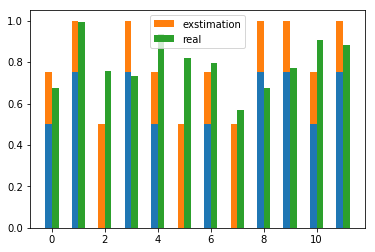

In [56]:
index = np.arange(len(explored_dict))
a1 = np.empty(0)
a2 = np.empty(0)
b = np.empty(0) 

for key in player_survey_dict.keys():
    
    if explored_dict[key][0] =="<50":
        lowerLimit = 0.0
        upper = 0.5
    if explored_dict[key][0] == "50-75":
        lowerLimit = 0.5
        upper = 0.25
    if explored_dict[key][0] == ">75":
        lowerLimit = 0.75
        upper = 0.25
        
    a1 = np.append(a1, [lowerLimit])
    a2 = np.append(a2, [upper])
    
    b = np.append(b, [float(explored_dict[key][1]) / 100])
    


total_width, n = 0.5, 2
width = total_width / n
index = index - (total_width - width) / 2

plt.bar(index, a1,  width=width, )
plt.bar(index, a2, bottom=a1, width=width, label='exstimation')
plt.bar(index + width, b , width=width, label='real')
plt.legend()
plt.show()

## most probable map

In [57]:
surveyFinished = False
startSurveyIndex = 1
choicefour_dict = {}

while(surveyFinished == False):

    completeSurveyFilePath = surveyDir + "/" + fileName + str(startSurveyIndex) + ".txt"

    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:
            surveyData = json.load(surveyFile)
            surveyIp = surveyData["ip"]
            choicefour = surveyData["choicefour"]       
                
            choicefour_dict[surveyIp] = choicefour.strip()
            startSurveyIndex += 1

    else:
        surveyFinished = True

In [58]:
for i in choicefour_dict:
    print(i, "\t", choicefour_dict[i])

10.41.203.49 	 2
10.181.109.73 	 3
10.7.181.120 	 2
10.150.134.248 	 2
10.13.215.245 	 1
10.31.72.218 	 3
10.30.82.114 	 1
10.45.76.149 	 2
10.45.245.200 	 1
10.51.190.34 	 1
10.45.249.93 	 1
10.65.198.176 	 2


In [59]:
real_y = np.ones(len(choicefour_dict),dtype=np.int8)
predicted_y =np.empty(0,dtype=np.int8)
for i in choicefour_dict:
    predicted_y = np.append(predicted_y, [int(choicefour_dict[i])])

cm = confusion_matrix(real_y,predicted_y)

print("\t",cm[0][0],"\t",cm[0][1])
print("\t",cm[1][0],"\t",cm[1][1])

	 5 	 5
	 0 	 0
